## Quotations indicate the career success of public figures
**ChillDataGroup: Zihan Wu, Yinhao Wang, Yihang Chen**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load QuoteBank Dataset
We refer to the pipeline provided in Google Colab to load the quotations from 2015 to 2020.

Due to the large size of data, when loading them, we just load the data said by the senate election since 2015 candidates. The dataset for senate elections is obtained from MIT Election Data and Science Lab [1].

We also provide the codes for loading these senate candidate quotations below, but those are run ahead in google colab (takes around 30min for each year's data). We did not re-run them here. It contains the senate election results for all candidates

[1] MIT Election Data and Science Lab, 2017, "U.S. Senate 1976–2020", https://doi.org/10.7910/DVN/PEJ5QU, Harvard Dataverse, V5, UNF:6:cIUB3CEIKhMi9tiY4BffLg== [fileUNF]

In [2]:
# Pipeline obtained from the course google colab
from tld import get_tld

def get_domain(url):
    res = get_tld(url, as_object=True)
    return res.tld


In [3]:
# Load the Senate Election Result data 
import pandas as pd
senate_file = 'SenateData/1976-2020-senate.csv'
senate_election = pd.read_csv(senate_file, encoding= 'unicode_escape')
senate_election.sample(10) # demonstrate the format of election data

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party_detailed,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified
863,1988,PENNSYLVANIA,PA,42,23,14,US SENATE,statewide,gen,False,HENRY HALLER III,LIBERTARIAN,False,total,11822,4366598,False,20210114,LIBERTARIAN
201,1978,MINNESOTA,MN,27,41,33,US SENATE,statewide,gen,True,DAVID DURENBERGER,REPUBLICAN,False,total,957908,1558376,False,20210114,REPUBLICAN
1641,2000,CALIFORNIA,CA,6,93,71,US SENATE,statewide,gen,False,GAIL KATHERINE LIGHTFOOT,LIBERTARIAN,False,total,187718,10623608,False,20210114,LIBERTARIAN
963,1990,NEW JERSEY,NJ,34,22,12,US SENATE,statewide,gen,False,DON MACKLE,SOCIALIST WORKERS,False,total,7804,1938454,False,20210114,OTHER
2595,2010,NEVADA,NV,32,88,65,US SENATE,statewide,gen,False,SCOTT ASHJIAN,TEA PARTY OF NEVADA,False,total,5811,721404,False,20210114,OTHER
2386,2008,OKLAHOMA,OK,40,73,53,US SENATE,statewide,gen,False,JAMES M. INHOFE,REPUBLICAN,False,total,763375,1346819,False,20210114,REPUBLICAN
1404,1996,MINNESOTA,MN,27,41,33,US SENATE,statewide,gen,False,PAUL WELLSTONE,DEMOCRATIC-FARMER-LABOR,False,total,1098430,2182905,False,20210114,DEMOCRAT
1995,2004,FLORIDA,FL,12,59,43,US SENATE,statewide,gen,False,NaN,NaN,True,total,27,7429894,False,20210114,OTHER
3513,2020,KENTUCKY,KY,21,61,51,US SENATE,statewide,gen,False,HAROLD H. FITZPATRICK,NaN,True,total,1,2135057,False,20210114,OTHER
2839,2012,VERMONT,VT,50,13,6,US SENATE,statewide,gen,False,BERNARD SANDERS,INDEPENDENT,False,total,207848,292762,False,20210114,OTHER


Here, we only choose the candidate running for elections since 2016, because the supported Quotebank data goes back to 2015

In [4]:
# Load the names of candidates since 2016
# The NaN names are dropped, and repeated names are dropped
def delete_middle_name(name): # delete middle name
  name_split = name.split()
  if len(name_split) > 2:
    senate_delete_middle_name = name_split[0] + ' ' + name_split[-1]
    return senate_delete_middle_name
  return name

def isSenate(name,senate_names):
  name_set = set(name.split())
  for i in range(len(senate_names)):
    if senate_names[i] <= name_set:
      return (True, i)
  return (False, None)

senate_candidates = senate_election[senate_election['year'] >= 2016]['candidate'].dropna().unique()
senate_candidates[1:10]
senate_candidates_splitted = list(map(lambda senate: set(delete_middle_name(senate).split()), senate_candidates))
senate_candidates_splitted[1:10]

[{'RICHARD', 'SHELBY'},
 {'JOE', 'MILLER'},
 {'GIANOUTSOS', 'TED'},
 {'METCALFE', 'RAY'},
 {'MARGARET', 'STOCK'},
 {'BRECK', 'CRAIG'},
 {'LISA', 'MURKOWSKI'},
 {'ANTHONY', 'CAMBONI'},
 {'ANN', 'KIRKPATRICK'}]

**We donot run the cell below because takes too long.** We have run those on google colab to load the quotation data we need

In [ ]:
# Load each year's data, filtering out the quotations said by senates
# For now, we ignore name variations of the same persion, just focusing the names
# provided in the senate candidates dataset
import bz2
import json

path_to_file = '/content/drive/MyDrive/Quotebank/quotes-{}.json.bz2' 
path_to_out = '/content/drive/MyDrive/MyQuoteBank/quotes-{}-senates-said.json.bz2'

for year in range(2015, 2021):
  print('... Start reading quotations in year ' + str(year))
  with bz2.open(path_to_file.format(year), 'rb') as s_file:
      with bz2.open(path_to_out.format(year), 'wb') as d_file:
          for instance in s_file:
              instance = json.loads(instance) # loading a sample
              issenate = isSenate(instance['speaker'], senate_candidates_splitted)
              if issenate[0]:
                instance['speaker'] = senate_candidates[issenate[1]] # simplify the name
                urls = instance['urls'] # extracting list of links
                domains = []
                for url in urls:
                    tld = get_domain(url)
                    domains.append(tld)
                instance['domains'] = domains # updating the sample with domain name
                d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing in the new file

## 1. Process Senate Candidate Data
**1.1** In this section, we load the information of senate candidates (since 2016) and their election information.

In [5]:
# First, we get the election information of the candidates since 2016 (again, we drop NaN and repeated names)
candidate_info = senate_election[senate_election['year'] >= 2016].dropna(subset=['candidate']).drop_duplicates(subset=['candidate'], ignore_index=True)


In [6]:
# Load the stored quotations said by senate candidates since 2015 (by year)
senate_quote_20 = pd.read_json('SenateData/quotes-2020-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_19 = pd.read_json('SenateData/quotes-2019-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_18 = pd.read_json('SenateData/quotes-2018-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_17 = pd.read_json('SenateData/quotes-2017-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_16 = pd.read_json('SenateData/quotes-2016-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_15 = pd.read_json('SenateData/quotes-2015-senates-said.json.bz2', lines=True, compression='bz2')


In [7]:
# Concatenate data across all years and display the format of quotation data
annual_frames = [senate_quote_15, senate_quote_16, senate_quote_17, senate_quote_18, senate_quote_19, senate_quote_20]
candidate_quotes = pd.concat(annual_frames)
candidate_quotes.sample(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
198665,2018-12-23-010249,grave policy errors which will endanger our na...,Marco Rubio,[Q324546],2018-12-23 23:38:49,1,"[[Marco Rubio, 0.7202], [President Donald Trum...",[http://onenewspage.com/n/Politics/1zjb79cvdr/...,E,[com]
58739,2017-06-20-005874,"And again, getting back to the initial point, ...",Bernie Sanders,[Q359442],2017-06-20 14:49:53,1,"[[Bernie Sanders, 0.6114], [None, 0.2916], [El...",[http://dailycaller.com/2017/06/20/sanders-and...,E,[com]
147854,2018-10-09-096718,the single most important thing I've been invo...,Mitch McConnell,[Q355522],2018-10-09 03:32:15,1,"[[Mitch McConnell, 0.7214], [None, 0.154], [Br...",[http://www.wave3.com/2018/10/09/mcconnell-tal...,E,[com]
51378,2017-05-31-017024,called for naval exercises in the South China ...,John Mccain,[Q10390],2017-05-31 08:19:48,1,"[[John Mccain, 0.7669], [None, 0.2331]]",[http://indiatoday.intoday.in/story/john-mccai...,E,[in]
103024,2015-05-24-040251,The law is very clear that you cannot take mon...,John Kennedy,"[Q16090838, Q16105132, Q16195622, Q1700694, Q2...",2015-05-24 04:19:06,2,"[[John Kennedy, 0.788], [None, 0.212]]",[http://kplctv.com/story/29130362/zurik-mers-c...,E,"[com, com]"
11480,2018-08-28-034923,I found myself on both sides of that table ove...,Mitch McConnell,[Q355522],2018-08-28 00:00:00,41,"[[Mitch McConnell, 0.7537], [None, 0.2195], [J...",[https://abcnews.go.com/Politics/note-florida-...,E,"[com, com, com, com, com, com, com, com, com, ..."
110677,2015-03-11-090765,This is a medical treatment that has a medical...,Rand Paul,[Q463557],2015-03-11 12:38:00,2,"[[Rand Paul, 0.7514], [None, 0.1704], [Kirsten...",[http://www.istockanalyst.com/article/viewarti...,E,"[com, com]"
29423,2020-02-13-058784,It's time for members of Congress in the House...,Doug Collins,"[Q18352424, Q3162841, Q5300375, Q919954]",2020-02-13 15:10:53,1,"[[Doug Collins, 0.5385], [None, 0.4404], [Roge...",[https://www.nationalreview.com/news/rep-colli...,E,[com]
191210,2018-02-24-047639,Meals on Wheels is funded in a variety of ways...,Tina Smith,"[Q18631509, Q22670437]",2018-02-24 02:20:35,1,"[[Tina Smith, 0.9016], [None, 0.0862], [John C...",[http://www.kare11.com/article/news/nutrition-...,E,[com]
97620,2017-03-10-100985,The American people deserve to know who is pot...,Chris Van Hollen,[Q1077819],2017-03-10 17:56:43,3,"[[Chris Van Hollen, 0.8248], [None, 0.168], [P...",[http://www.huffingtonpost.com/opensecrets-blo...,E,"[com, org, org]"


**1.2** We group the total number of quotations by speaker and dates. By doing so, we can visualize the change of quoted numbers as time goes on. Below, we take Bernie Sanders as an example.

In [8]:
# Clean the names by taking only upper case
# Group the candidate total number of quotes by day
candidate_quotes['speaker'] = candidate_quotes['speaker'].str.upper()
candidate_quotes['date_only'] = candidate_quotes['date'].dt.date
candidate_quotes_byday = candidate_quotes.groupby(['speaker', 'date_only'])['numOccurrences'].sum()
candidate_quotes_byday

speaker          date_only 
AARON JAMES      2015-01-22     2
                 2015-02-10     7
                 2015-03-20     2
                 2015-04-03     1
                 2015-05-21     2
                               ..
ZAK RINGELSTEIN  2018-10-30    12
                 2018-11-01     5
                 2018-11-05     1
                 2018-11-07     1
                 2019-03-21     1
Name: numOccurrences, Length: 105532, dtype: int64

Text(0.5, 1.0, 'Bernie Sanders')

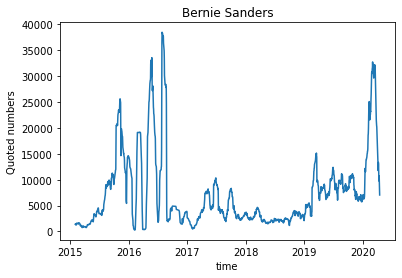

In [9]:
# For example, we can visualize the quotation changes of Bernie Sanders
candidate_quotes_byday['BERNIE SANDERS'].rolling(window=30).sum().plot() # one months average
plt.xlabel('time')
plt.ylabel('Quoted numbers')
plt.title('Bernie Sanders')

**1.3** We compute the total number of quotations until their election. The election dataset only contains the year of election. However, since the U.S. Senate elections always take place in the first week of November, we just compute the total number of quotations until November.1st of the election year.

In [10]:
# Add the election day corresponding to each candidate speaker
candidate_info_byname = candidate_info.set_index(['candidate']) # Allow access info by name as index
candidate_quotes['election_day'] = candidate_quotes['speaker'].map(candidate_info_byname['year']).astype(str)+ '-11-01'
candidate_quotes['election_day'] = pd.to_datetime(candidate_quotes['election_day'])

In [11]:
# Add election result (i.e. vote rate) for each candidate speaker
candidate_info_byname['vote_rate'] = candidate_info_byname['candidatevotes']/candidate_info_byname['totalvotes']

In [12]:
# We group the number of quotations by election day
quotes_byelection = candidate_quotes[candidate_quotes['date_only'] < candidate_quotes['election_day']]
tot_quotes_byelection = pd.DataFrame(quotes_byelection.groupby(['speaker'])['numOccurrences'].sum())
tot_quotes_byelection.rename(columns = {'numOccurrences': 'total_quotes_byelection'}, inplace=True)

Pearson coefficient: 0.6486209170091917, p value: 7.222286382241334e-23


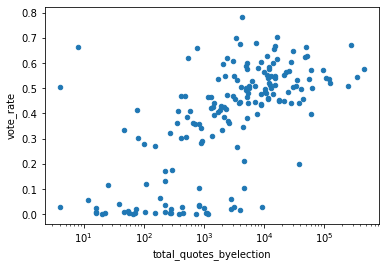

In [13]:
# We add the vote rate and plot the scatter plot of vote rate against total quotes by election
from scipy.stats import pearsonr
tot_quotes_byelection['vote_rate'] = tot_quotes_byelection.index.map(candidate_info_byname['vote_rate'])
quotes_vote = tot_quotes_byelection.plot.scatter(x = 'total_quotes_byelection', y = 'vote_rate', logx=True)
(corr1, pvalue) = pearsonr(np.log(tot_quotes_byelection['total_quotes_byelection']), tot_quotes_byelection['vote_rate'])
print(f'Pearson coefficient: {corr1}, p value: {pvalue}')

**Observation**: Based on the plot above, we can see that there is a positive correlation between quotations and vote_rate with p value < 0.05. The more a candidate was quoted before the election, the higher the voting rate he or she got.

## 2. Weigh the quotations by reading statistics
We are aware of the different reading statistics of different publishers or news agencies. We try to weigh the quotations by popularities of the publishers.

**A problem of QuoteBank noticed when parsing url**: some urls are list of list of urls, like: [['url_a', 'url_b'], 'url_c', 'url_d']

**2.1** First, we sample 20k quotes and look at the source media of those quotations. This would give us a feel of how much media is covered by QuoteBank and which media appear most often.

In [14]:
# Sample 20k quotes and see where published
sample = candidate_quotes.sample(20000)
total_domains = []
for i in sample.index:
    urls = sample.at[i,'urls']
    for url in urls: # Some URL here is actually a list (there are lists in list), not sure why it happens
        if isinstance(url, list):
            for url_ in url:
                total_domains.append(get_tld(url_, as_object=True).domain) # when it is a list, the multiply urls point to the same website
        else:
            total_domains.append(get_tld(url, as_object=True).domain)

In [17]:
# Count the frequency of media occurences in quotation dataset
from collections import Counter
domain_count = Counter(total_domains).most_common()
print("----top 30 news agency/publisher:\n ", domain_count[0:30])
print('----number of news agency covered:', len(domain_count))


----top 30 news agency/publisher:
  [('krmg', 1824), ('msn', 1140), ('washingtonexaminer', 1117), ('breitbart', 1096), ('cnn', 1060), ('washingtontimes', 979), ('thehill', 970), ('news965', 959), ('businessinsider', 951), ('wokv', 895), ('cbsnews', 858), ('yahoo', 823), ('foxnews', 747), ('newsmax', 716), ('politico', 707), ('washingtonpost', 638), ('einnews', 546), ('nytimes', 535), ('sfgate', 504), ('huffingtonpost', 482), ('kdhnews', 452), ('nbcnews', 439), ('news12', 394), ('abc-7', 392), ('startribune', 378), ('newsweek', 375), ('rollcall', 360), ('wsbradio', 350), ('ktvz', 346), ('seattletimes', 336)]
----number of news agency covered: 4072


Among 20k samples, there are over 4000 different website domains, indicating a sufficiently wide coverage of media. So the quotations can be an indicator of public exposure. Besides, we observe an exponential decrease of counts in the database.

Text(0.5, 0, 'occurences in sampled quote data')

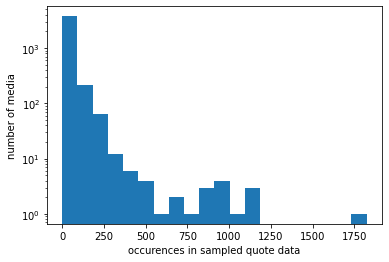

In [18]:
# Plot the histogram characterizing the frequency of each media appearing
_, y_counts = zip(*domain_count)
plt.hist(y_counts, bins=20)
plt.yscale('log')
plt.ylabel('number of media')
plt.xlabel('occurences in sampled quote data')

The distribution is heavy-tailed, with only a few big media like CNN and Fox News occurring frequently. Most media occurs no more than 1.5% among all quotations. So, we think it is sufficient to just weigh the quotations extracted from those frequently occurring media. Moreover, it is very difficult to automatically find media's reading statistics (or other indicators of popularity) just based on the url major domain name. We could not think of a way to do so. Neither could we find an open dataset helping us. Therefore, we decide to manually look up the reading statistics of those top 30 new agencies. For the rest media, we will sample 10 media from them and manually look up the reading statistics. We will take the average reading statistics of those 10 media to represent the reading statistics of the rest media. This will take up some time, so we plan to finish those manual work in the following weeks (see proposed timeline). As a result, we do not include any exposure level (quotation weighted by media reading statistics) in Milestone 2. Instead, we just use the number of quotations (assuming all media offer the same public exposure).

## 4. Features for Prediction Model
In the proposal, we decide to build a model predicting election results based on quotation data. Here, we preprocess the quote data and candidate data to generate the features for training our model.

The first feature is the change of quotation number over time.

We also include the party affiliation of each candidate. Moreover, we also consider the affiliated party's vote rate in the most recent presidential election. Since we are looking at the election from 2016 to 2021, we will use the 2016 presidential election data for the senate election from 2016 to 2019, and use the 2020 presidential election data for the senate election from 2020 to 2021.

The presidential election data also comes from the MIT Election Data and Science Lab[2]. It contains the presidential election voting result by each state.

[2]MIT Election Data and Science Lab, 2017, "U.S. President 1976–2020", https://doi.org/10.7910/DVN/42MVDX, Harvard Dataverse, V6, UNF:6:4KoNz9KgTkXy0ZBxJ9ZkOw== [fileUNF]

In [19]:
# We load 2016 and 2020 result separately
president = pd.read_csv('SenateData/1976-2020-president.csv')
president16 = president[president['year'] == 2016].copy()
president20 = president[president['year'] == 2020].copy()
president16.sample(10) #display format of president election data

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
3567,2016,MINNESOTA,MN,27,41,33,US PRESIDENT,"DE LA FUENTE, ROQUE """"ROCKY""""",AMERICAN DELTA PARTY,False,1430,2944782,20210113,NaN,OTHER
3442,2016,COLORADO,CO,8,84,62,US PRESIDENT,"SILVA, ROD",NUTRITION PARTY,False,751,2780220,20210113,NaN,OTHER
3598,2016,NEW HAMPSHIRE,NH,33,12,4,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,345790,744296,20210113,NaN,REPUBLICAN
3687,2016,TEXAS,TX,48,74,49,US PRESIDENT,"STEIN, JILL",GREEN,False,71558,8969226,20210113,NaN,OTHER
3543,2016,MARYLAND,MD,24,52,52,US PRESIDENT,"CLINTON, HILLARY",DEMOCRAT,True,78,2781446,20210113,NaN,DEMOCRAT
3457,2016,DELAWARE,DE,10,51,11,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,185127,441590,20210113,NaN,REPUBLICAN
3612,2016,NEW JERSEY,NJ,34,22,12,US PRESIDENT,"LA RIVA, GLORIA ESTELLA",SOCIALISM AND LIBERATION PARTY,False,1682,3874046,20210113,NaN,OTHER
3624,2016,NEW YORK,NY,36,21,13,US PRESIDENT,"CLINTON, HILLARY",WORKING FAMILIES,False,140041,7802084,20210113,NaN,OTHER
3419,2016,ARKANSAS,AR,5,71,42,US PRESIDENT,"JOHNSON, GARY",LIBERTARIAN,False,29829,1130635,20210113,NaN,LIBERTARIAN
3596,2016,NEVADA,NV,32,88,65,US PRESIDENT,"DE LA FUENTE, ROQUE """"ROCKY""""",NO PARTY AFFILIATION,False,2552,1125385,20210113,NaN,OTHER


In [20]:
# We add vote rate to each candidate in each state
president16['vote_rate'] = president16['candidatevotes']/president16['totalvotes']
president20['vote_rate'] = president20['candidatevotes']/president20['totalvotes']

In [21]:
# We group the data by states and party_simplified (represent small parties, independent, NaN all by 'Others'). 
# We take sum of vote rates of cadidates from the same party_simplified
vote_byparty16 = president16.groupby(['state', 'party_simplified'])['vote_rate'].sum()
vote_byparty20 = president20.groupby(['state', 'party_simplified'])['vote_rate'].sum()
vote_byparty16

state      party_simplified
ALABAMA    DEMOCRAT            0.343579
           LIBERTARIAN         0.020942
           OTHER               0.014648
           REPUBLICAN          0.620831
ALASKA     DEMOCRAT            0.365509
                                 ...   
WISCONSIN  REPUBLICAN          0.472182
WYOMING    DEMOCRAT            0.216289
           LIBERTARIAN         0.051343
           OTHER               0.058384
           REPUBLICAN          0.673984
Name: vote_rate, Length: 201, dtype: float64

In [22]:
# We create feature dataframe and add in party_simplified, party vote rate in most recent presidential election, and final vote rate
# If the senate candidate's affiliated party does not show up in the most recent president election, party_vote_rate is 0
features = candidate_info_byname[['party_simplified', 'vote_rate']].copy()
for name in features.index:
    state_ = candidate_info_byname.loc[name, 'state']
    party_ = candidate_info_byname.loc[name, 'party_simplified']
    if candidate_info_byname.loc[name, 'year'] < 2020: #for candidate before 2020
        if party_ in vote_byparty16[state_].index:  #check whether the affiliated party in recent president election
            features.loc[name, 'party_vote_rate'] = vote_byparty16[state_][party_]
        else: 
            features.loc[name, 'party_vote_rate'] = 0
    else:
        if party_ in vote_byparty20[state_].index: 
            features.loc[name, 'party_vote_rate'] = vote_byparty20[state_][party_]
        else: 
            features.loc[name, 'party_vote_rate'] = 0

In [23]:
features.sample(10)

,party_simplified,vote_rate,party_vote_rate
candidate,,,
"WILLIAM ROBERT LANG, JR.",OTHER,0.000713,0.015900
JOSEPH J. HECK,REPUBLICAN,0.446704,0.455007
TRUDY A. AUSTIN,OTHER,0.004214,0.045616
NEAL TAYLOR GALE,OTHER,0.006248,0.011694
EDWARD DAVIDA,REPUBLICAN,0.000008,0.490560
JOHNATHAN MCFARLAND,OTHER,0.010969,0.016260
BOB HUGIN,REPUBLICAN,0.428281,0.413504
DEAN HELLER,REPUBLICAN,0.453850,0.455007
TIM HAGAN,LIBERTARIAN,0.009460,0.033219
